# Домашнее задание 5

Добро пожаловать на пятое домашнее задание! В нем Вам предлагается построить дерево решений для задачи бинарной классификации с помощью алгоритма ID3: 

Обучающий датасет состоит из данных о людях, в которых содержится информация об их оценках в школе по **математике, информатике и русскому языку**. В качестве целевого признака нужно предсказать **работают они Data scientist'ами или нет**.

Давайте посмотрим на предложенный набор данных!

In [2]:
import pandas as pd
df = pd.read_csv("ds_dataset_train.csv", index_col = 0)

In [3]:
df

,Математика,Информатика,Русский_язык,Data_scientist
id,,,,
0,5,2,3,1
1,3,5,5,1
2,4,2,3,0
3,4,4,3,0
4,3,4,4,1
...,...,...,...,...
1995,3,3,3,0
1996,2,2,2,0
1997,2,2,4,1


### Задание 1

Обучите алгоритм Id3 на обучающем датасете. Для этого определите несколько промежуточных переменных.

1) <code>X</code> -- в эту переменную сохраните признаки предикторы

2) <code>y</code> -- в эту перемнную сохраните целевой признак

In [4]:
from sklearn import tree

X = df.drop(["Data_scientist"],axis=1)
y = df["Data_scientist"]


clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=0)
clf = clf.fit(X,y)

#### Информационная справка

В инициализации <code>DecisionTreeClassifier</code> Вы можете заметить параметр <code>random_state=0</code>. Данная команда фиксирует генератор случайных чисел, для того чтобы Вы смогли получить такие же результате в ходе обучения алгоритма, как и авторы данного курса. 

Когда <code>random_state</code> не определено в коде для каждого запуска, результаты алгоритма будут меняться для каждого запуска.

### Задание 2

Постройте визуализацию обученного дерева решений 

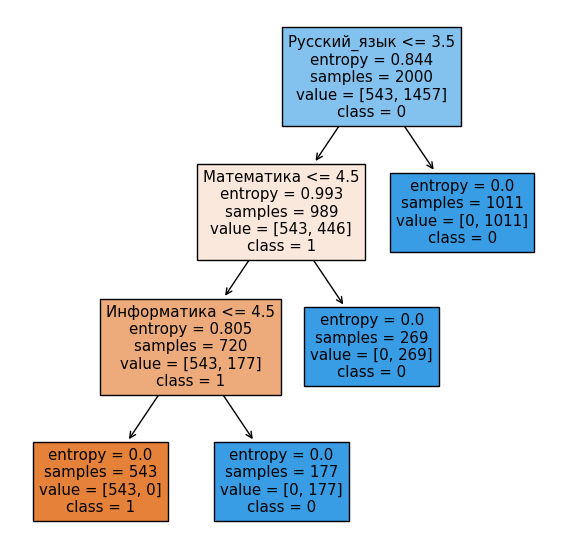

In [5]:
import matplotlib.pyplot as plt # библиотека для красивой визуализации изображений
plt.figure(figsize=(7,7))
tree.plot_tree(clf, feature_names=X.columns,  
                   class_names=['1','0'],
                   filled=True)
plt.show()

### Задание 3

Оцените качество полученные модели с помощью <code>accuracy_score</code> 

In [6]:
df["prediction"] = clf.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y,df['prediction'])

1.0

In [7]:
assert accuracy_score(y,df['prediction']) == 1.0, "Неправильно обучен алгоритм id3"

### Задание 4

Оцените качество полученные модели на валидациооном датасете с помощью метрик качества таких как: <code>accuracy</code>, <code>precision</code>, <code>recall</code> и <code>f1_score</code>

In [8]:
df_val = pd.read_csv("ds_dataset_val.csv", index_col = 0)
X_val = df_val.drop(['Data_scientist'],axis=1)
y_val = df_val['Data_scientist']
df_val["prediction"] = clf.predict(X_val)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
acc_val = accuracy_score(y_val,df_val['prediction'])

In [12]:
precision_val = precision_score(y_val,df_val['prediction'])

In [13]:
recall_val = recall_score(y_val,df_val['prediction'])

In [14]:
f1_val = f1_score(y_val,df_val['prediction'])

И так, поздравляем, Вы выполнили пятое домашнее задание!

Теперь осталось чуть-чуть...

На платформу Школково Вам нужно будет загрузить таблицу с метриками качества вашей модели измеренными на валидационном датасете.

Чтобы сделать это, выполните ячейку выше. Тем самым Вы получите нужную таблицу. Загрузите ее на платформу Школково.

In [15]:
df_rezults = pd.DataFrame([
                    [acc_val, precision_val, recall_val, f1_val]
                    ],
                   columns=['accuracy', 'precision', 'recall', 'f1'], index=["Дерево решений ID3"])

In [16]:
df_rezults.to_csv("h5_prod.csv")

In [17]:
df_rezults

,accuracy,precision,recall,f1
Дерево решений ID3,0.836667,0.814978,0.963542,0.883055
